# Trabajo práctico 3: Redes
## Aclaraciones:
Para poder correr dicho notebook, necesitan estar todos los archivos *.mat en el mismo directorio del notebook.

## Alumnos:
De Sousa Bispo Germán Edgardo 359/12
<br> Podavini Rey Martín Gastón 483/12 </br>
<br> Wright Carolina Rocío 876/12 </br>

In [2]:
import plotly.plotly
import random

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from plotly.graph_objs import Histogram, Scatter, Layout, Figure

plotly.offline.init_notebook_mode()

## 1. Creación del Grafo
A partir del archivo de datos, genere el grafo de colaboraciones entre autores. Cuente el número de
nodos y aristas. Haga una representación gráfica del grafo.

In [3]:
def tuplizar(lista):
    lista_de_tuplas = []
    for index, elem_1 in enumerate(lista):
        for elem_2 in lista[index+1:]:
            lista_de_tuplas.append((elem_1, elem_2))

    return lista_de_tuplas

In [4]:
fields = ['authors']
df = pd.read_csv('data.csv', dtype={'authors': str}, skipinitialspace=True, usecols=fields)
df = df.dropna()
df_nodes = df.applymap(lambda x: [autor.strip() for autor in x.split('&')])
df_edges = df.applymap(lambda x: tuplizar([autor.strip() for autor in x.split('&')]))

lista_de_autores = df_nodes['authors'].tolist()
lista_de_autores = [item for sublist in lista_de_autores for item in sublist]
lista_de_autores_sin_repetidos = np.unique(lista_de_autores)
                         
lista_de_coautores = df_edges['authors'].tolist()
lista_de_coautores = [item for sublist in lista_de_coautores for item in sublist]

Ahora que tenemos agrupados los nodos (autores) y aristas (que relacionan coautores) procedemos a armar el grafo de autores.

In [5]:
G = nx.Graph()
G.add_nodes_from(lista_de_autores_sin_repetidos)
G.add_edges_from(lista_de_coautores)

original_graph = G

In [23]:
print('La cantidad de nodos es: ' + str(G.number_of_nodes()))
print('La cantidad de aristas es: ' + str(G.number_of_edges()))

La cantidad de nodos es: 4026
La cantidad de aristas es: 7977


/Users/caro/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

/Users/caro/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

/Users/caro/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning:

axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.

/Users/caro/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning:

axes.hold is deprecated, will be removed in 3.0



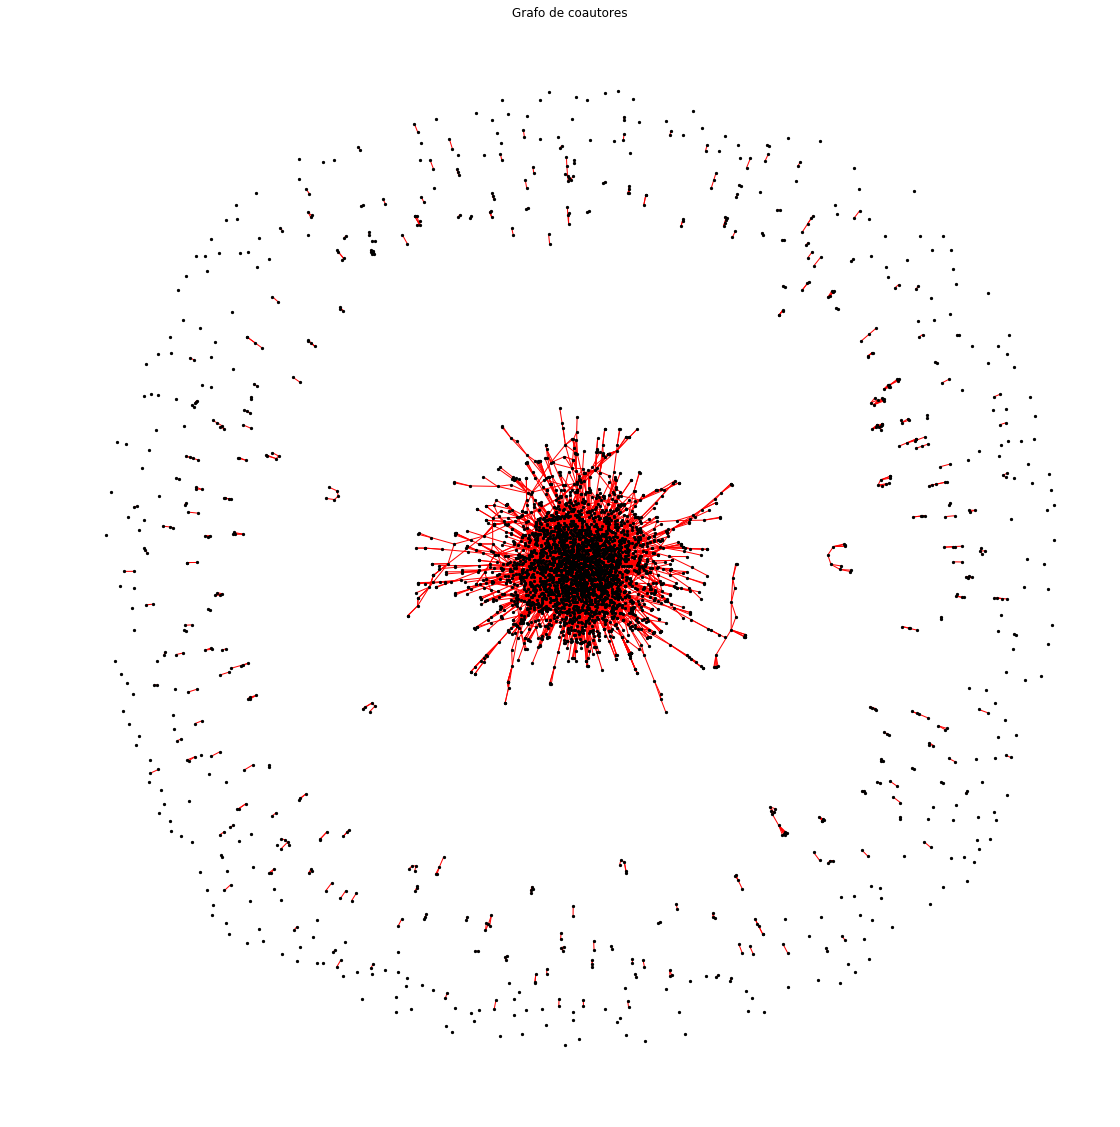

In [6]:
plt.figure(figsize=(15, 15))
nx.draw(G, node_size=5, node_color='black', edge_color='red')
plt.title('Grafo de coautores')
plt.show()

## 2. Distribución de Grado
Grafique la distribución del grado de los autores, en escalas lineales, semilogarítmica, y log-log. Argumente,
a partir de los gráficos, de qué tipo de distribución se trata.

In [24]:
degree_values = list(dict(G.degree()).values())
histogram, bin_edges = np.histogram(degree_values, bins=np.max(degree_values))
histogram

array([295, 839, 812, 559, 360, 287, 186, 143, 106,  85,  70,  38,  40,
        42,  34,  28,  10,  21,  13,   7,   7,   8,   7,   7,   4,   3,
         3,   0,   4,   1,   0,   1,   0,   0,   0,   3,   0,   0,   0,
         1,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1])

A continuación podemos ver la distribución de grado, es decir el número de vecinos.

In [30]:
data = [Histogram(x=degree_values)]

plotly.offline.iplot(data, filename='basic histogram')

In [34]:
trace1 = Scatter(
            y=histogram
        )
data = [trace1]

layout = Layout(
    title="Distribución de grados - escala lineal",
    xaxis=dict(
        autorange=True
    ),
    yaxis=dict(
        autorange=True
    )
)

fig = Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='distribucion grados')

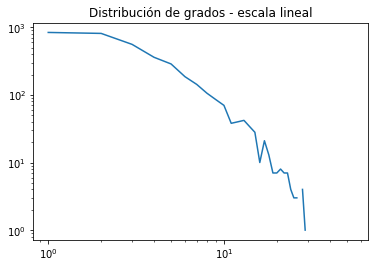

In [35]:
plt.loglog(histogram)
plt.title("Distribución de grados - escala log-log")
plt.show()

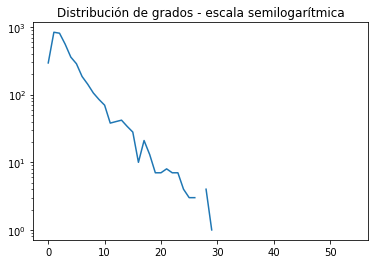

In [36]:
plt.semilogy(histogram)
plt.title("Distribución de grados - escala semilogarítmica")
plt.show()

## 3. Componentes Conexas
Calcule el número de componentes conexas del grafo. Muestre el tamaño de la componente mayor, o
componente gigante.

In [37]:
nx.number_connected_components(G)
connected_components = nx.connected_component_subgraphs(G)

In [38]:
def find_maximal_subgraph(subgraphs):
    maximun_number_of_nodes_in_subgraph = 0
    maximun_clique = []
    for subgraph in subgraphs:
        if len(subgraph.nodes()) > maximun_number_of_nodes_in_subgraph:
            maximun_clique = subgraph
            maximun_number_of_nodes_in_subgraph = len(subgraph.nodes())
    return maximun_clique

In [39]:
gigant_component = find_maximal_subgraph(connected_components)
print(len(gigant_component))

3048


## 4. Tamaños de Vecindades
Trabajando con la componente gigante del grafo, estudie, parándose en un nodo al azar, cómo aumenta
el número de autores alcanzados a medida que se aleja del nodo semilla. Grafique el número de autores
alcanzados en función de la distancia al nodo semilla. Grafique también el número de nuevos autores
que se agregan en cada paso, y estime el máximo de esta función. Pruebe con varios nodos semillas y
analice la robustez de este resultado. Discuta el significado de los gr´aficos y su relación con el fenómeno
de seis grados de separación.

## CURIOSIDAD

In [14]:
#cliques = nx.find_cliques(G)
#print(len(find_maximal_subgraph(cliques)))

In [15]:
#print(len(find_maximal_subgraph(connected_components)))

# OJOTA FALTA EL MONTECARLO PARA LA CONCLUSION!!!

In [16]:
connected_components = nx.connected_component_subgraphs(G)
maximal_connected_component = list(find_maximal_subgraph(connected_components))
random_seed_node = random.choice(maximal_connected_component)
visited_nodes = [random_seed_node]

neighbors = list(G.neighbors(random_seed_node))
neighbors_len = len(neighbors)

average_layer_neighborhood = 0
final_result = []

while(len(visited_nodes) < len(maximal_connected_component)):
    neighbors_of_neighborhood = []
    neighborhood_sum_degree = 0
    visited_nodes.extend(neighbors)
    
    for neighbor in neighbors:
        neighbors_of_neighborhood.extend(list(G.neighbors(neighbor)))
        neighborhood_sum_degree += G.degree(neighbor)
        
    # DIFERENCIA SIMETRICA
    neighbors = list(set(visited_nodes) ^ set(neighbors_of_neighborhood))
    average_layer_neighborhood = neighborhood_sum_degree / neighbors_len
    final_result.append(average_layer_neighborhood)

In [17]:
trace1 = Scatter(
            y=final_result
        )
data = [trace1]

layout = Layout(
    xaxis=dict(
        title='Capa',
        autorange=True
    ),
    yaxis=dict(
        title='Promedio de grados de mis vecinos',
        autorange=True
    )
)

fig = Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='distribucion grados')

## 5. Mundos pequeños

In [18]:
G = gigant_component

/home/sherman1000/miniconda3/envs/cienciadatos/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

/home/sherman1000/miniconda3/envs/cienciadatos/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

/home/sherman1000/miniconda3/envs/cienciadatos/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning:

axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.

/home/sherman1000/miniconda3/envs/cienciadatos/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning:

axes.hold is deprecated, will be removed in 3.0

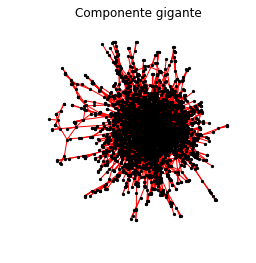

In [19]:
plt.figure(figsize=(3, 3))
nx.draw(G, node_size=5, node_color='black', edge_color='red')
plt.title('Componente gigante')
plt.show()

Ahora calculemos el valor de clustering para G así como el camino mínimo medio.

In [20]:
nx.average_clustering(G)

0.48302619444687783

In [21]:
nx.average_shortest_path_length(G)

6.098283712648817

Ahora generaremos un grafo aleatorio con la misma distribución de grado. Por eso, usemos los mismos grados que tienen el grafo conocido para crear el nuevo

In [22]:
degree_values = list(dict(G.degree()).values())

/home/sherman1000/miniconda3/envs/cienciadatos/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

/home/sherman1000/miniconda3/envs/cienciadatos/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

/home/sherman1000/miniconda3/envs/cienciadatos/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning:

axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.

/home/sherman1000/miniconda3/envs/cienciadatos/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning:

axes.hold is deprecated, will be removed in 3.0

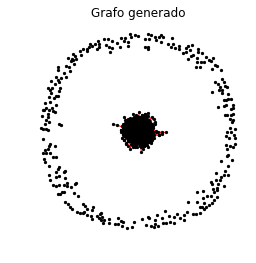

In [23]:
generated_graph = nx.expected_degree_graph(degree_values)

plt.figure(figsize=(3, 3))
nx.draw(generated_graph, node_size=5, node_color='black', edge_color='red')
plt.title('Grafo generado')
plt.show()

Armo el grafo generado como un grafo conexo. Así no voy a tener problemas con las mismas mediciones que hicimos para el grafo gigante.

/home/sherman1000/miniconda3/envs/cienciadatos/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

/home/sherman1000/miniconda3/envs/cienciadatos/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

/home/sherman1000/miniconda3/envs/cienciadatos/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning:

axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.

/home/sherman1000/miniconda3/envs/cienciadatos/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning:

axes.hold is deprecated, will be removed in 3.0

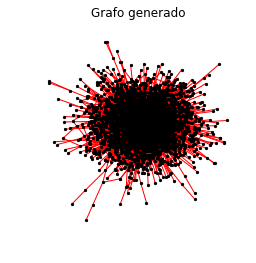

In [24]:
generated_graph_connected = nx.connected_component_subgraphs(generated_graph)
maximal_generated_graph_connected = find_maximal_subgraph(generated_graph_connected)

plt.figure(figsize=(3, 3))
nx.draw(maximal_generated_graph_connected, node_size=5, node_color='black', edge_color='red')
plt.title('Grafo generado')
plt.show()

In [25]:
print('Clustering para componente gigante es ' + str(nx.average_clustering(G)))
print('Clustering para grafo generado es ' + str(nx.average_clustering(maximal_generated_graph_connected)))

Clustering para componente gigante es 0.48302619444687783
Clustering para grafo generado es 0.004355733128553637


In [26]:
print('Camino mínimo medio para componente gigante es ' + str(nx.average_shortest_path_length(G)))
print('Camino mínimo medio para grafo generado es ' + str(nx.average_shortest_path_length(maximal_generated_graph_connected)))

Camino mínimo medio para componente gigante es 6.098283712648817
Camino mínimo medio para grafo generado es 4.42996245099842


## 6. Estrellas
Comencemos por analizar las siguientes métricas:

In [27]:
degree_centrality = nx.degree_centrality(original_graph)

from operator import itemgetter
sorted(degree_centrality.items(), key=itemgetter(1), reverse=True)

[('Lee', 0.013664596273291927),
 ('Ambjorn', 0.010434782608695653),
 ('Kim', 0.009689440993788821),
 ('Ferrara', 0.008695652173913044),
 ('Park', 0.008695652173913044),
 ('Vafa', 0.008695652173913044),
 ('Strominger', 0.007701863354037267),
 ('Lu', 0.007204968944099379),
 ('Das', 0.006956521739130435),
 ('Gibbons', 0.006956521739130435),
 ('Odintsov', 0.006956521739130435),
 ('Pope', 0.006956521739130435),
 ('Ivanov', 0.006459627329192547),
 ('Townsend', 0.006459627329192547),
 ('Zhang', 0.006459627329192547),
 ('Grisaru', 0.006211180124223603),
 ('Klebanov', 0.006211180124223603),
 ('Seiberg', 0.006211180124223603),
 ('Bergshoeff', 0.005962732919254659),
 ('Johnson', 0.005962732919254659),
 ('Martellini', 0.005962732919254659),
 ('Nieuwenhuizen', 0.005962732919254659),
 (')', 0.005714285714285714),
 ('Dorey', 0.005714285714285714),
 ('Douglas', 0.005714285714285714),
 ('Kallosh', 0.005714285714285714),
 ('Polchinski', 0.005714285714285714),
 ('Sorella', 0.005714285714285714),
 ('Yang'

In [28]:
closeness_centrality = nx.closeness_centrality(original_graph)

from operator import itemgetter
sorted(closeness_centrality.items(), key=itemgetter(1), reverse=True)

[('Lee', 0.1844128378955481),
 ('Vafa', 0.18315354743508938),
 ('Strominger', 0.17903102890387423),
 ('Lu', 0.1779536935964755),
 ('Ferrara', 0.1777753970248567),
 ('Kim', 0.17748813299457647),
 ('Park', 0.17741987357876438),
 ('Gibbons', 0.17634830094782228),
 ('Polchinski', 0.1760925090768391),
 ('Lowe', 0.17599845692030486),
 ('Townsend', 0.17563662349786915),
 ('Peet', 0.17506343172415875),
 ('Horowitz', 0.1740988585098887),
 ('Witten', 0.17379715012036737),
 ('Tseytlin', 0.173640151791442),
 ('Schwarz', 0.1733270045384367),
 ('Johnson', 0.17295012194627843),
 ('Duff', 0.17271701807544107),
 ('Kallosh', 0.1721241531525644),
 ('Kogan', 0.17159915015604194),
 ('Khuri', 0.17144609606046643),
 ('Minasian', 0.17139513868312645),
 ('Grisaru', 0.17124244813641543),
 ('Rabinovici', 0.17124244813641543),
 ('Harvey', 0.170621775012761),
 ('Klebanov', 0.17024398674422583),
 ('Olive', 0.17024398674422583),
 ('Bergshoeff', 0.1700055849349584),
 ('Pope', 0.16970539849893435),
 ('Li', 0.169518319

In [29]:
def edges_of_nodes(nodes, in_graph):
    return [edge for edge in in_graph.edges() if edge[0] in nodes and edge[1] in nodes]


In [30]:
def graph_taking_from_an_amount(from_dict, amount_of_stars_that_have_influence):
    best_stars = sorted(from_dict.items(), key=itemgetter(1), reverse=True)[:amount_of_stars_that_have_influence]
    best_stars = [star[0] for star in best_stars]

    nodes_without_stars = set(original_graph.nodes()) - set(best_stars)
    edges_without_stars = edges_of_nodes(nodes_without_stars, original_graph)

    graph_without_stars = nx.Graph()
    graph_without_stars.add_nodes_from(nodes_without_stars)
    graph_without_stars.add_edges_from(edges_without_stars)

    plt.figure(figsize=(3, 3))
    nx.draw(graph_without_stars, node_size=5, node_color='black', edge_color='red')
    plt.title('Grafo generado')
    plt.show()

Comencemos a probar con la métrica de Degree Centrality y de Closeness Centrality y comparando los grafos resultado. 

/home/sherman1000/miniconda3/envs/cienciadatos/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

/home/sherman1000/miniconda3/envs/cienciadatos/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

/home/sherman1000/miniconda3/envs/cienciadatos/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning:

axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.

/home/sherman1000/miniconda3/envs/cienciadatos/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning:

axes.hold is deprecated, will be removed in 3.0

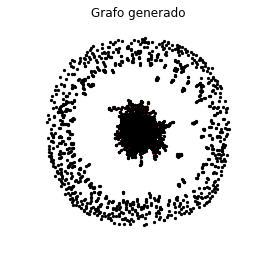

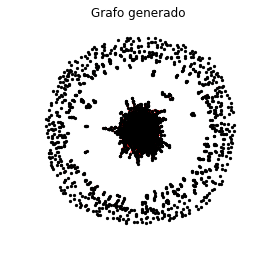

In [33]:
graph_taking_from_an_amount(degree_centrality, 50)
graph_taking_from_an_amount(closeness_centrality, 50)

/home/sherman1000/miniconda3/envs/cienciadatos/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

/home/sherman1000/miniconda3/envs/cienciadatos/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

/home/sherman1000/miniconda3/envs/cienciadatos/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning:

axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.

/home/sherman1000/miniconda3/envs/cienciadatos/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning:

axes.hold is deprecated, will be removed in 3.0

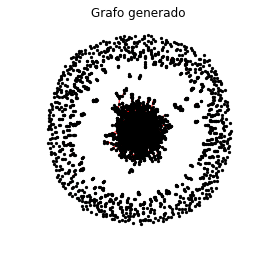

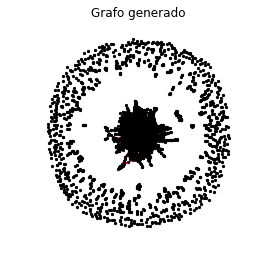

In [34]:
graph_taking_from_an_amount(degree_centrality, 200)
graph_taking_from_an_amount(closeness_centrality, 200)

/home/sherman1000/miniconda3/envs/cienciadatos/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

/home/sherman1000/miniconda3/envs/cienciadatos/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

/home/sherman1000/miniconda3/envs/cienciadatos/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning:

axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.

/home/sherman1000/miniconda3/envs/cienciadatos/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning:

axes.hold is deprecated, will be removed in 3.0

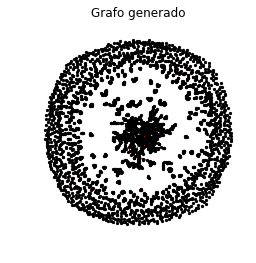

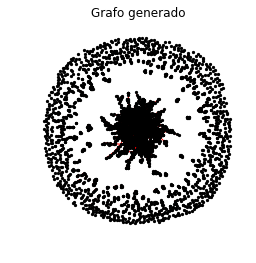

In [35]:
graph_taking_from_an_amount(degree_centrality, 600)
graph_taking_from_an_amount(closeness_centrality, 600)

A simple vista podemos ver como empezamos a romper la componente gigante. Comparativamente tambien se puede notar como la componente gigante retirando nodos con la métrica de Degree Centrality es más chica que la obtenida utilizando Closeness Centrality. 

Probemos retirando más nodos. 

/home/sherman1000/miniconda3/envs/cienciadatos/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

/home/sherman1000/miniconda3/envs/cienciadatos/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

/home/sherman1000/miniconda3/envs/cienciadatos/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning:

axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.

/home/sherman1000/miniconda3/envs/cienciadatos/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning:

axes.hold is deprecated, will be removed in 3.0

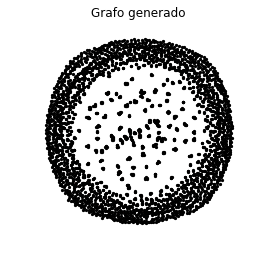

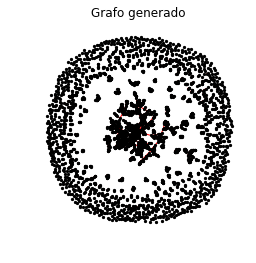

In [36]:
graph_taking_from_an_amount(degree_centrality, 1000)
graph_taking_from_an_amount(closeness_centrality, 1000)

Aquí podemos ver como con retirando los 1000 mejores obtenidos con Degree Centrality hemos roto completamente la componente gigante mientras que con la otra métrica todavia no. 